# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [11]:
weather_api_key = "c029ef3763cf738b61945c277ec005fb"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | fuyang
Processing Record 4 of Set 1 | vikasnagar
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | general acha
Processing Record 12 of Set 1 | roma
Processing Record 13 of Set 1 | andujar
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | tarawa
Processing Record 16 of Set 1 | rabigh
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | arar
Processing Record 20 of Set 1 | ta`u
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | tocopilla
Processing Record 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [14]:
city_weather

{'coord': {'lon': -67.9573, 'lat': -46.7949},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 9.89,
  'feels_like': 6.88,
  'temp_min': 9.89,
  'temp_max': 9.89,
  'pressure': 1012,
  'humidity': 56,
  'sea_level': 1012,
  'grnd_level': 977},
 'visibility': 10000,
 'wind': {'speed': 6.73, 'deg': 284, 'gust': 7.28},
 'clouds': {'all': 70},
 'dt': 1686765331,
 'sys': {'country': 'AR', 'sunrise': 1686744909, 'sunset': 1686775745},
 'timezone': -10800,
 'id': 3841309,
 'name': 'Pico Truncado',
 'cod': 200}

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,12.09,43,75,3.60,CA,1686764699
1,ribeira grande,38.5167,-28.7000,21.22,88,20,7.60,PT,1686764614
2,fuyang,32.9000,115.8167,25.86,44,0,3.29,CN,1686765080
3,vikasnagar,30.4683,77.7750,29.96,44,83,1.94,IN,1686765081
4,bethel,41.3712,-73.4140,25.86,63,20,5.14,US,1686764479


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,12.09,43,75,3.60,CA,1686764699
1,ribeira grande,38.5167,-28.7000,21.22,88,20,7.60,PT,1686764614
2,fuyang,32.9000,115.8167,25.86,44,0,3.29,CN,1686765080
3,vikasnagar,30.4683,77.7750,29.96,44,83,1.94,IN,1686765081
4,bethel,41.3712,-73.4140,25.86,63,20,5.14,US,1686764479


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

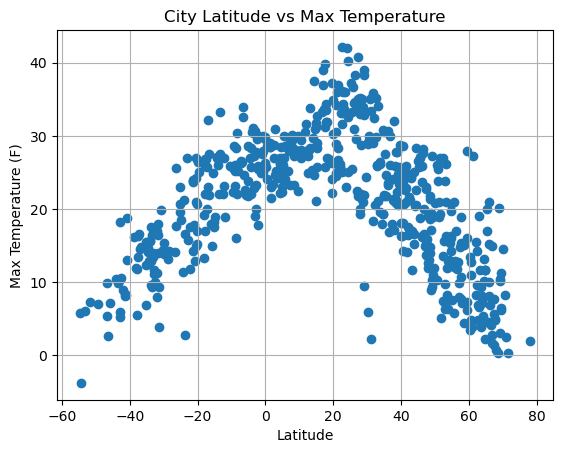

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

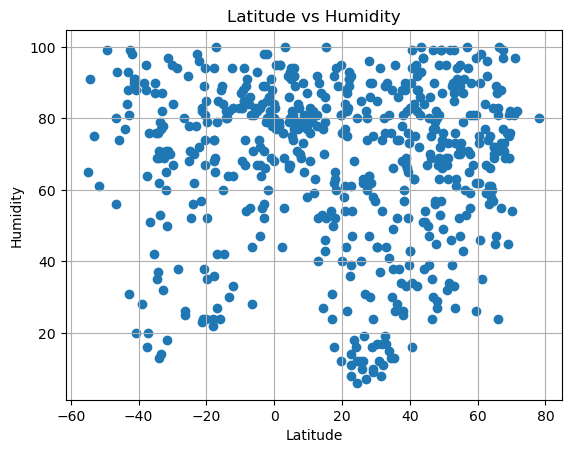

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

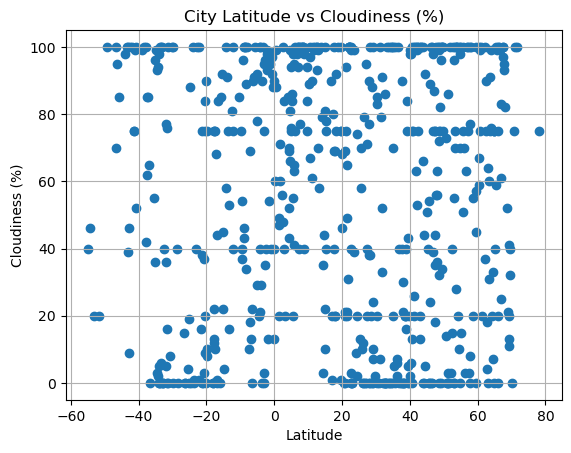

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

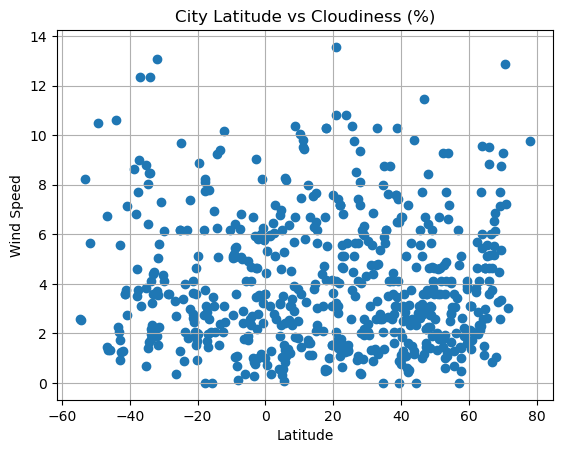

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [116]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    # Create and fit the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")


In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,12.09,43,75,3.60,CA,1686764699
1,ribeira grande,38.5167,-28.7000,21.22,88,20,7.60,PT,1686764614
2,fuyang,32.9000,115.8167,25.86,44,0,3.29,CN,1686765080
3,vikasnagar,30.4683,77.7750,29.96,44,83,1.94,IN,1686765081
4,bethel,41.3712,-73.4140,25.86,63,20,5.14,US,1686764479


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,pisco,-13.7000,-76.2167,22.03,64,75,1.54,PE,1686764496
7,edinburgh of the seven seas,-37.0676,-12.3116,14.55,76,65,12.35,SH,1686764604
9,kerikeri,-35.2268,173.9474,6.90,90,36,0.67,NZ,1686764701
10,general acha,-37.3770,-64.6043,16.59,20,85,9.01,AR,1686765083
13,port-aux-francais,-49.3500,70.2167,7.05,99,100,10.50,TF,1686764604


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5320815533766342


NameError: name 'rvalue' is not defined

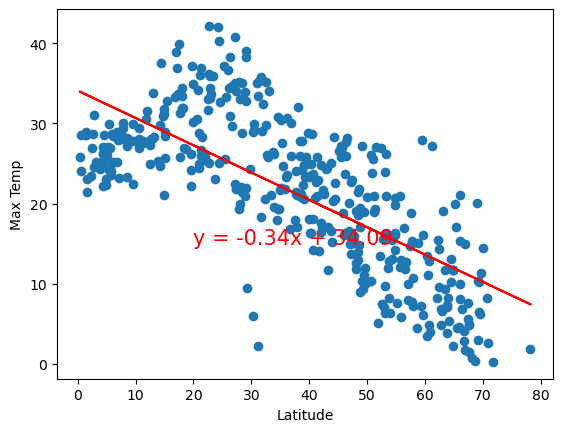

In [119]:
# Linear regression on Northern Hemisphere
nh_plot = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show

The r-value is: 0.6956729643684041


NameError: name 'rvalue' is not defined

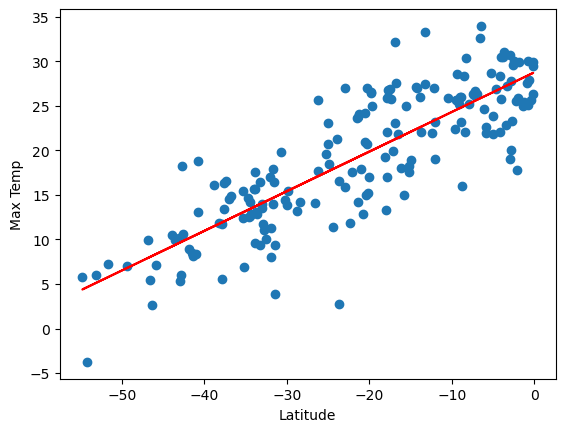

In [121]:
# Linear regression on Southern Hemisphere
sh_plot = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show

**Discussion about the linear relationship:** The linear relationship between the 2 plots are very close. The r values for the 2 plots are close which means ther is a close linear relationship. Both plots show positive linear relationships.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5320815533766342


NameError: name 'rvalue' is not defined

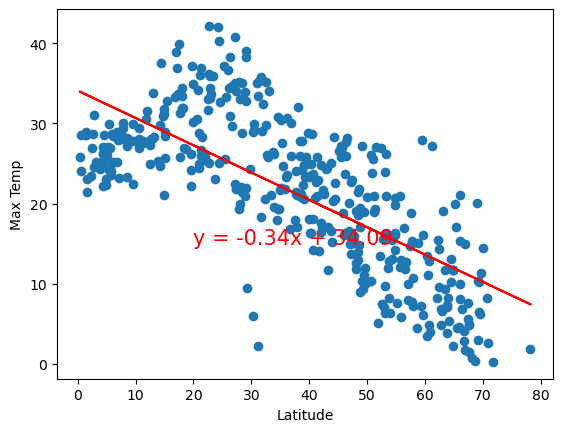

In [124]:
# Northern Hemisphere
nh_plot1 = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show

The r-value is: 0.007256788546260446


NameError: name 'rvalue' is not defined

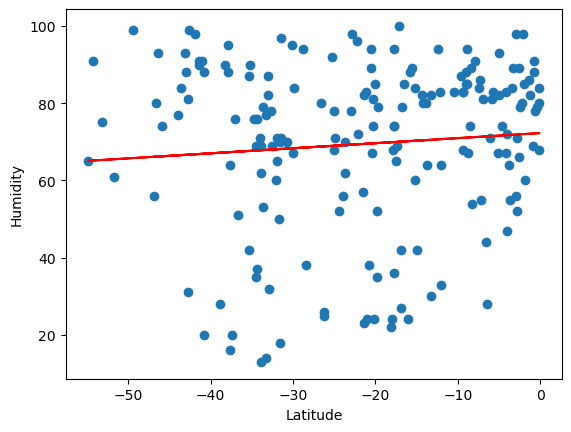

In [125]:
# Southern Hemisphere
sh_plot1 = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show

**Discussion about the linear relationship:** These 2 plots are very different. The first one is showing a strong negative correlation and the second one has a very slight positive correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006664477492522548


NameError: name 'rvalue' is not defined

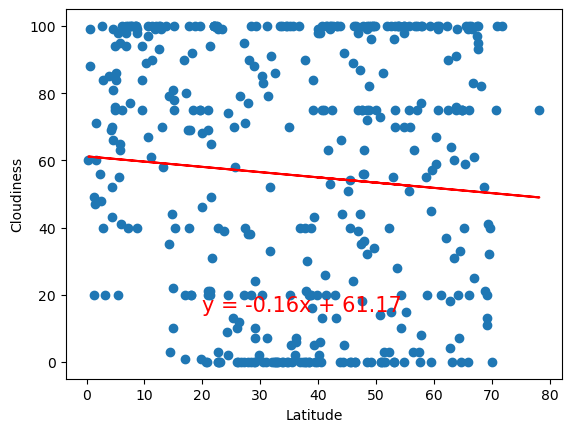

In [134]:
# Northern Hemisphere
nh_plot2 = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show

The r-value is: 0.0004368163318046886


NameError: name 'rvalue' is not defined

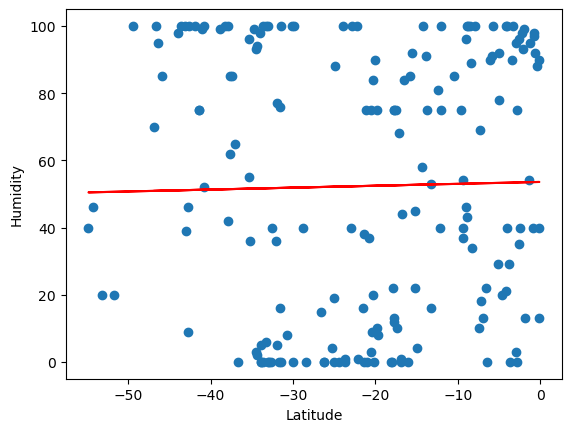

In [135]:
# Southern Hemisphere
sh_plot2 = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show

**Discussion about the linear relationship:** These 2 plots have a very similar linear relationship. The plots show that they are both almost a straight line but there is still a very small positive relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.9376752855345286e-07


NameError: name 'rvalue' is not defined

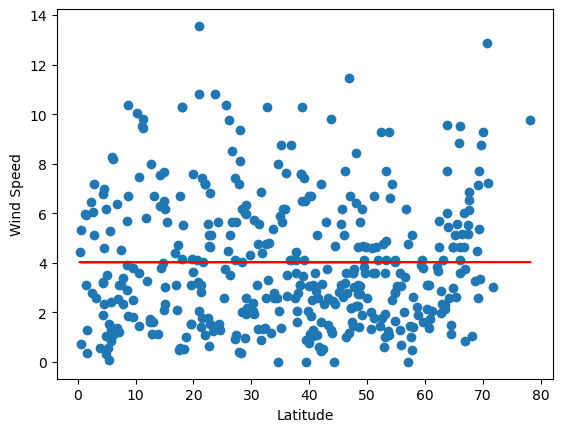

In [136]:
# Northern Hemisphere
nh_plot3 = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show

The r-value is: 0.015827907682715647


NameError: name 'rvalue' is not defined

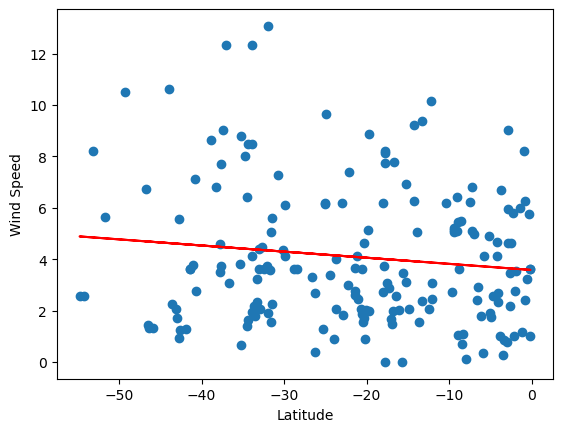

In [140]:
# Southern Hemisphere
sh_plot3 = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show

**Discussion about the linear relationship:** The first plot has no positive or negative correlation but the southern hemisphere plot shows a slight negative correlation. 